In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn transformers

In [3]:
import pandas as pd

# Load the dataset
file_path = "Hackathon_Round_1.xlsx"  # Update the file name if necessary
data = pd.read_excel(file_path)

# Display the first few rows
print(data.head())
print(data.info())


                    ID                                               Text  \
0  1304930000000000000  even if you are ensconced in a pandemic pod wi...   
1  1303730000000000000  donald trump sacrificed thousands of americans...   
2  1303640000000000000  new coronavirus anger in china as doctor who d...   
3  1303220000000000000  is he joking  birmingham stabbings violent out...   
4  1303070000000000000  as soon as i saw this headline straight away i...   

                    User_Name subtask_a subtask_b  
0       J. Rodríguez, Ph.D.💥👀      CORO      COEM  
1             jhon ciabattari      CORO      COEM  
2  Shaun Dakin #ClimateAction      CORO      COEM  
3            Billy #Boom Kane      CORO      COEM  
4              Mr Jambon Fumé      CORO      COEM  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71641 entries, 0 to 71640
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         71641 non-null  int64 


In [4]:
import pandas as pd

# Load the dataset
file_path = "Hackathon_Round_1.xlsx"  # Replace with the correct path if needed
data = pd.read_excel(file_path)

# Display the first few rows to confirm successful loading
print(data.head())


                    ID                                               Text  \
0  1304930000000000000  even if you are ensconced in a pandemic pod wi...   
1  1303730000000000000  donald trump sacrificed thousands of americans...   
2  1303640000000000000  new coronavirus anger in china as doctor who d...   
3  1303220000000000000  is he joking  birmingham stabbings violent out...   
4  1303070000000000000  as soon as i saw this headline straight away i...   

                    User_Name subtask_a subtask_b  
0       J. Rodríguez, Ph.D.💥👀      CORO      COEM  
1             jhon ciabattari      CORO      COEM  
2  Shaun Dakin #ClimateAction      CORO      COEM  
3            Billy #Boom Kane      CORO      COEM  
4              Mr Jambon Fumé      CORO      COEM  


In [5]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values if necessary
data = data.dropna()


ID           0
Text         0
User_Name    0
subtask_a    0
subtask_b    0
dtype: int64


In [6]:
print(data.columns)



Index(['ID', 'Text', 'User_Name', 'subtask_a', 'subtask_b'], dtype='object')


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [9]:
file_path = "Hackathon_Round_1.xlsx"
data = pd.read_excel("/content/Hackathon_Round_1.xlsx")

In [8]:
print("Column Names:", data.columns)
print(data.head())

Column Names: Index(['ID', 'Text', 'User_Name', 'subtask_a', 'subtask_b'], dtype='object')
                    ID                                               Text  \
0  1304930000000000000  even if you are ensconced in a pandemic pod wi...   
1  1303730000000000000  donald trump sacrificed thousands of americans...   
2  1303640000000000000  new coronavirus anger in china as doctor who d...   
3  1303220000000000000  is he joking  birmingham stabbings violent out...   
4  1303070000000000000  as soon as i saw this headline straight away i...   

                    User_Name subtask_a subtask_b  
0       J. Rodríguez, Ph.D.💥👀      CORO      COEM  
1             jhon ciabattari      CORO      COEM  
2  Shaun Dakin #ClimateAction      CORO      COEM  
3            Billy #Boom Kane      CORO      COEM  
4              Mr Jambon Fumé      CORO      COEM  


In [10]:
data.columns = data.columns.str.strip()

In [11]:
print("Missing Values:", data.isnull().sum())
data = data.dropna()

Missing Values: ID           0
Text         0
User_Name    0
subtask_a    0
subtask_b    0
dtype: int64


In [12]:
print("Column Names After Cleaning:", data.columns)

Column Names After Cleaning: Index(['ID', 'Text', 'User_Name', 'subtask_a', 'subtask_b'], dtype='object')


In [13]:
first_level_label_column = "subtask_a"  # Update with actual column name
second_level_label_column = "subtask_b"  # Update with actual column name
tweet_content_column = "Text"  # Update with the column containing tweets

In [14]:
label_encoder_first = LabelEncoder()
label_encoder_second = LabelEncoder()

data[first_level_label_column] = label_encoder_first.fit_transform(data[first_level_label_column])
data[second_level_label_column] = label_encoder_second.fit_transform(data[second_level_label_column])

In [15]:
X = data[tweet_content_column]
y_first = data[first_level_label_column]
y_second = data[second_level_label_column]

In [16]:
X_train_first, X_test_first, y_train_first, y_test_first = train_test_split(X, y_first, test_size=0.2, random_state=42)


In [17]:
X_train_second, X_test_second, y_train_second, y_test_second = train_test_split(X, y_second, test_size=0.2, random_state=42)


In [18]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words="english")


In [19]:
X_train_tfidf_first = tfidf_vectorizer.fit_transform(X_train_first)
X_test_tfidf_first = tfidf_vectorizer.transform(X_test_first)

In [20]:
X_train_tfidf_second = tfidf_vectorizer.fit_transform(X_train_second)
X_test_tfidf_second = tfidf_vectorizer.transform(X_test_second)


In [21]:
clf_first = RandomForestClassifier(n_estimators=100, random_state=42)
clf_first.fit(X_train_tfidf_first, y_train_first)

RandomForestClassifier(random_state=42)

In [22]:
y_pred_first = clf_first.predict(X_test_tfidf_first)
print("First-Level Classification Report:")
print(classification_report(y_test_first, y_pred_first, target_names=label_encoder_first.classes_))

First-Level Classification Report:
              precision    recall  f1-score   support

        CORO       1.00      0.99      1.00      9381
        NOCO       0.99      1.00      0.99      4948

    accuracy                           1.00     14329
   macro avg       1.00      1.00      1.00     14329
weighted avg       1.00      1.00      1.00     14329



In [23]:
clf_second = RandomForestClassifier(n_estimators=10, random_state=42)
clf_second.fit(X_train_tfidf_second, y_train_second)


RandomForestClassifier(n_estimators=10, random_state=42)

In [24]:
y_pred_second = clf_second.predict(X_test_tfidf_second)
print("Second-Level Classification Report:")
print(classification_report(y_test_second, y_pred_second, target_names=label_encoder_second.classes_))

Second-Level Classification Report:
              precision    recall  f1-score   support

        COEM       0.95      0.93      0.94      4537
        CONE       0.94      0.95      0.95      4844
        NOEM       0.94      0.93      0.94      1947
        NONE       0.95      0.97      0.96      3001

    accuracy                           0.95     14329
   macro avg       0.95      0.95      0.95     14329
weighted avg       0.95      0.95      0.95     14329



In [25]:
results = pd.DataFrame({"Tweet_Content": X_test_first,
                        "First_Level_True": y_test_first,
                        "First_Level_Pred": y_pred_first,
                        "Second_Level_True": y_test_second,
                        "Second_Level_Pred": y_pred_second})

results.to_csv("classification_results.csv", index=False)
print("Results saved to classification_results.csv")

Results saved to classification_results.csv


In [26]:
pip install textblob


In [27]:
from textblob import TextBlob

# Function to compute sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negative"

# Apply sentiment analysis to the test dataset
X_test_sentiments = X_test_first.apply(get_sentiment)

# Display sentiment distribution
print("Sentiment Distribution:")
print(X_test_sentiments.value_counts())


Sentiment Distribution:
Text
Positive    6077
Negative    4379
Neutral     3873
Name: count, dtype: int64


In [28]:
results["Sentiment"] = X_test_sentiments
results.to_csv("classification_results_with_sentiment.csv", index=False)
print("Results with sentiment analysis saved to classification_results_with_sentiment.csv")


Results with sentiment analysis saved to classification_results_with_sentiment.csv


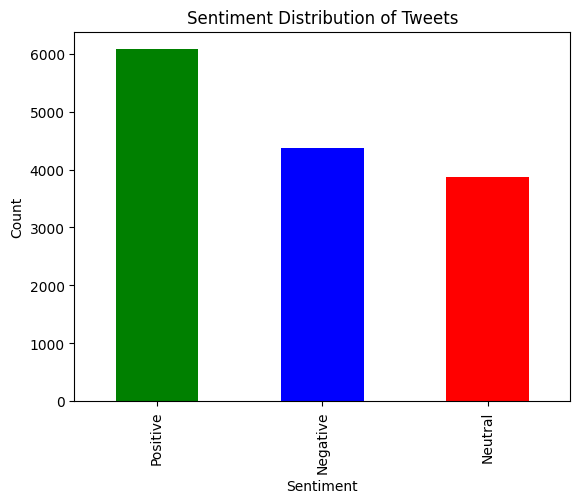

In [29]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
X_test_sentiments.value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title("Sentiment Distribution of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
